# Inter-Class

> Relationship between different classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def pairwise_angles(pair_sampler, n_samples=int(1e5)):
    dl = TfmdDL(range(n_samples),
                num_workers=0,
                after_item=lambda _: pair_sampler(),
                after_batch=lambda o: F.cosine_similarity(*o).arccos().rad2deg())
    return torch.cat(list(progress_bar(dl))).cpu()

def inter_class_hist(dl, fe):
    class_ftrs = ClassFeatures.compute(dl, fe)

    centroids = [f.centroid for f in class_ftrs.values()]
    angles = pairwise_angles(lambda: random.sample(centroids, 2))
    ax = plot_hist(angles)

    angles = pairwise_angles(lambda: [random.choice(f) for f in random.sample(list(class_ftrs.values()), 2)])
    ax = plot_hist(angles)

    ax.set_xlabel('Angle')
    ax.legend(['Between Class Means', 'Between Samples'])


    fix, ax = plt.subplots(1)
    candidates = [c for c, f in class_ftrs.items() if f.size(0)>100]
    class_pairs = [random.sample(candidates, 2) for _ in range(10)] 
    for c1, c2 in class_pairs:
        angles = pairwise_angles(lambda: [random.choice(class_ftrs[c]) for c in (c1, c2)], n_samples=int(1e4))
        plot_hist(angles)

    ax.legend([f'Classes {c1}, {c2}' for c1, c2 in class_pairs])    

In [ ]:
vggface2_fe, casia_webface_fe = fr_feature_extractors()
lfw_dl, pfr_dl = fr_dataloaders()

## VGGFace2

### LFW

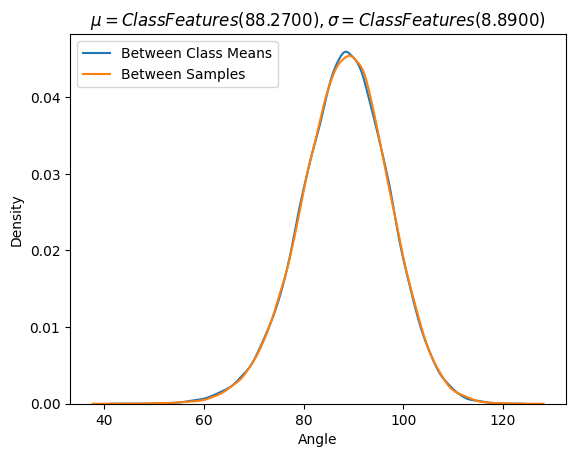

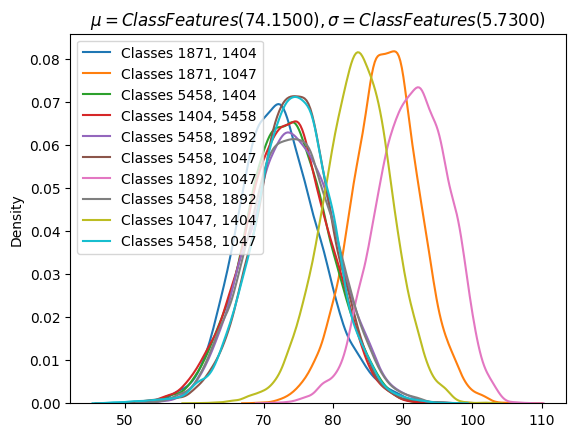

In [ ]:
inter_class_hist(lfw_dl, vggface2_fe)

### PFR

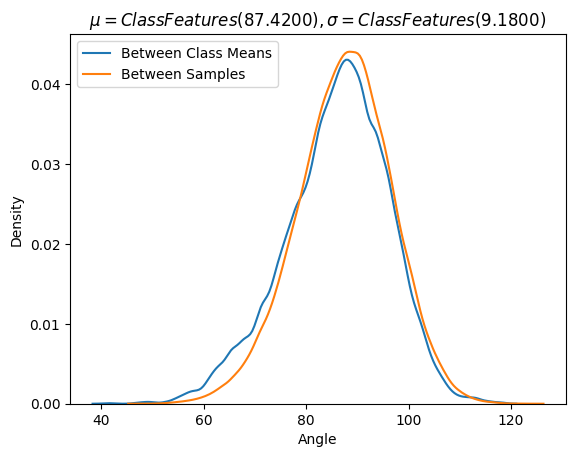

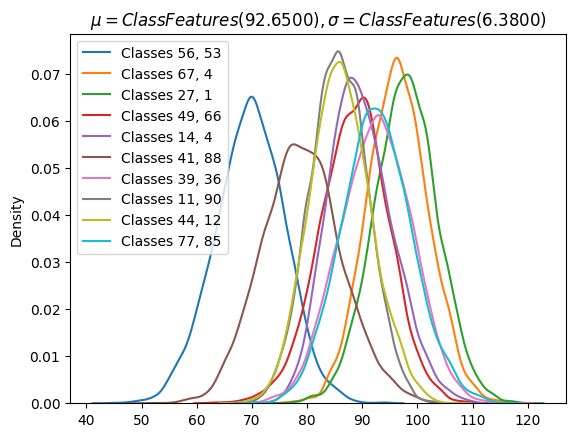

In [ ]:
inter_class_hist(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

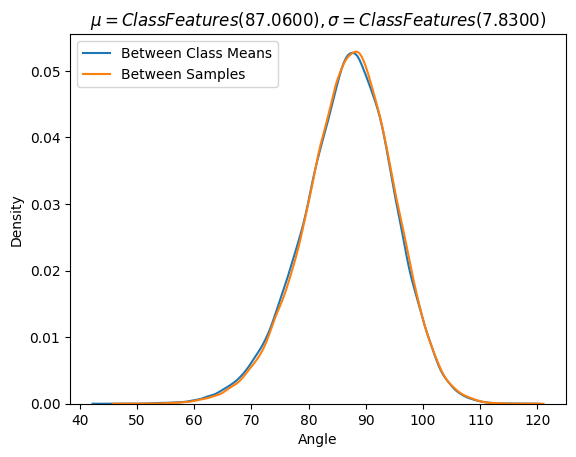

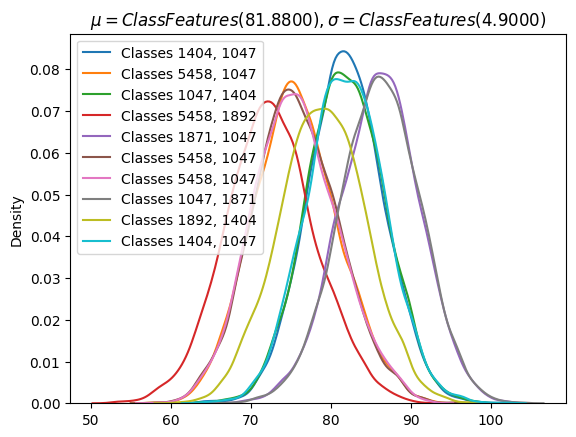

In [ ]:
inter_class_hist(lfw_dl, casia_webface_fe)

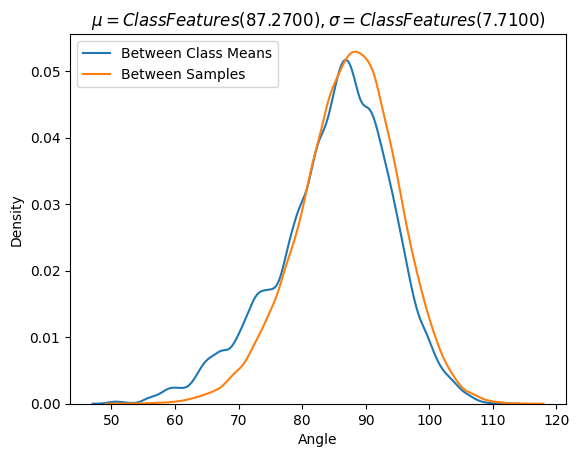

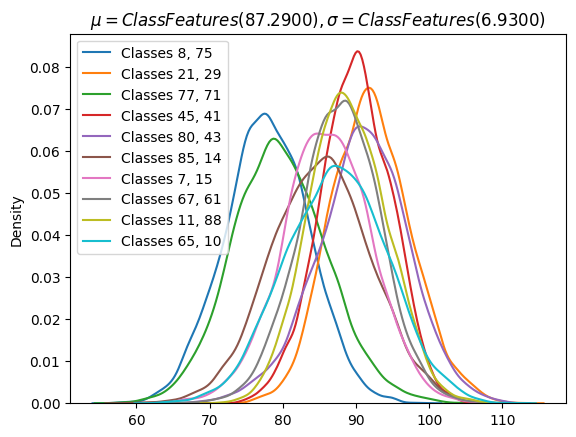

In [ ]:
inter_class_hist(pfr_dl, casia_webface_fe)